In [4]:
from numpy import array, dot, random, sign, arange, meshgrid, c_, ones, mean
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import perceptron
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import linear_model
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import scipy.stats as stats
from sklearn import tree
import itertools as it
import seaborn as sns
import pandas as pd
import numpy as np
import argparse
import locale
import os
import glob
import cv2
import time

In [ ]:
!wget --show-progress --continue -O /content/AlmacafeDataBase.csv https://github.com/Javiersuing/GitHub/raw/master/AlmacafeDataBase.csv
#https://raw.github.com/Javiersuing/GitHub/master/AlmacafeDataBase.csv

--2022-04-30 02:36:31--  https://github.com/Javiersuing/GitHub/raw/master/AlmacafeDataBase.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Javiersuing/GitHub/master/AlmacafeDataBase.csv [following]
--2022-04-30 02:36:31--  https://raw.githubusercontent.com/Javiersuing/GitHub/master/AlmacafeDataBase.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



### Data Analysis/Prep

Loading the data

In [6]:
df = pd.read_csv("AlmacafeDataBase.csv", sep=";", decimal=",")
#df = pd.read_csv("drive/My Drive/Tesis 2019/AlmacafeDataBase.csv", sep=";", decimal=",")
df = df.drop(["MUESTRA"],axis=1)
display(df.head(3))
print("Dataset dimensions : ", df.shape)

,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,...,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
0,CUNDINAMARCA,VILLETA,820,11.32,250.38,207.88,16.97,29.09,33.81,24.78,...,6.5,5.0,4.5,5.5,4.5,5.0,5.5,5.0,5.5,5.0
1,CUNDINAMARCA,FALTANTE,3000,8.74,250.42,206.51,17.53,30.17,32.00,24.40,...,6.0,6.0,6.0,6.0,5.5,5.5,5.0,5.5,5.5,5.5
2,CUNDINAMARCA,GUADUAS,990,10.57,250.20,208.94,16.49,36.77,35.52,17.81,...,5.5,4.5,4.0,5.0,4.0,4.5,4.0,4.5,5.0,4.0


Dataset dimensions :  (56, 46)


#### Se visualizan los estadísticos descriptivos

In [7]:
df.describe()

,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,...,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1628.464286,10.552857,250.437679,206.194821,17.666071,29.866607,30.087857,23.315000,10.631071,4.473036,...,5.062500,4.982143,4.857143,4.982143,4.821429,4.964286,5.187500,4.803571,5.107143,4.794643
std,555.439775,0.849658,0.289118,2.477325,0.989256,10.999099,3.269189,6.085673,3.621506,1.793525,...,0.647109,0.768495,0.872375,0.617652,0.844386,0.867898,0.806578,0.993975,0.761066,1.021482
min,820.000000,8.740000,250.030000,200.070000,15.120000,6.740000,22.170000,9.440000,2.890000,0.980000,...,3.500000,3.000000,2.500000,3.000000,3.000000,3.000000,3.500000,2.000000,3.500000,2.000000
25%,1230.000000,10.030000,250.195000,204.477500,17.135000,24.360000,28.140000,19.395000,8.210000,2.987500,...,5.000000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.375000
50%,1556.500000,10.640000,250.415000,206.005000,17.735000,29.285000,29.710000,22.995000,10.050000,4.695000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.500000,5.000000,5.500000,5.000000
75%,1740.000000,11.050000,250.602500,207.740000,18.342500,37.060000,32.262500,25.022500,12.535000,5.882500,...,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
max,3341.000000,12.880000,251.280000,212.620000,20.070000,60.130000,37.930000,38.680000,19.950000,7.760000,...,6.500000,6.500000,6.500000,6.000000,6.500000,6.500000,7.000000,7.000000,6.500000,6.500000


In [9]:
df.dtypes

DEPARTAMENTO       object
MUNICIPIO          object
ALTITUD             int64
HUMEDAD           float64
PESO.INI.PERG     float64
PESO.ALMEN        float64
MERMA             float64
%M 18/64          float64
%M 17/64          float64
%M 16/64          float64
%M 15/64          float64
%M 14/64          float64
%M 13/64          float64
%M 12/64          float64
%FONDO            float64
GRANOS.G1           int64
PESO.GRANOS.G1    float64
GRANOS.G2           int64
PESO.GRANOS.G2    float64
GRANO.BROC.P        int64
PESO.GRANO.B.P    float64
GRANOS.DEF          int64
PESO.DEF          float64
PORCENTAJE.DEF    float64
ALM.VERD.L*       float64
ALM.VERD.a*       float64
ALM.VERD.b*       float64
ALM.VERD.X        float64
ALM.VERD.Y        float64
ALM.VERD.Z        float64
CAFE.TOS.L*       float64
CAFE.TOS.a*       float64
CAFE.TOS.b*       float64
CAFE.TOS.X        float64
CAFE.TOS.Y        float64
CAFE.TOS.Z        float64
Aroma             float64
Sabor             float64
Sabor.Residu

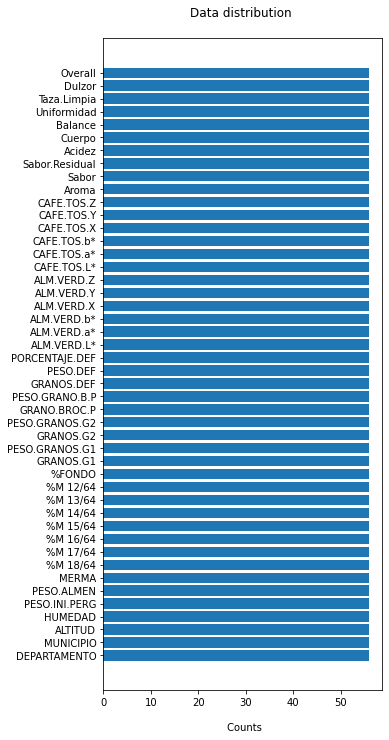

In [13]:
plt.figure(figsize=(5,12))
plt.barh(list(df),df.count())
plt.title("Data distribution \n")
plt.xlabel('\n Counts')
plt.show()

Exploring the non-numerical columns before one-hot encoding

In [14]:
for i in df:
    if df[i].dtypes == "object":
        print("%s has: "% i,np.size(df[i].unique())," categories")

DEPARTAMENTO has:  4  categories
MUNICIPIO has:  34  categories


In [18]:
b="DEPARTAMENTO"
i=0
df_departamento = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(df[b].unique()), 2)),columns=[b, 'Count'])
for c in sorted(df[b].unique()):
    df_departamento.loc[i,b]=c
    df_departamento.loc[i,"Count"]=i
    i=i+1

In [19]:
df_departamento

,DEPARTAMENTO,Count
0,0,0
1,1,1
2,2,2
3,3,3


In [16]:
b="MUNICIPIO"
i=0
dft = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(df[b].unique()), 2)),columns=[b, 'Count'])
for c in sorted(df[b].unique()):
    dft.loc[i,b]=c
    dft.loc[i,"Count"]=i
    i=i+1
display(dft)
for idx, row in df.iterrows():
    for j in range(len(dft[b])):
        if df.loc[idx,b]==dft.loc[j,b]:
            df.loc[idx,b]=dft.loc[j,"Count"]
            break

,MUNICIPIO,Count
0,ARMENIA,0
1,AURES,1
2,CALARCA,2
3,CUNDINAMARCA,3
4,DANTAS,4
5,EL BORDO,5
6,FALTANTE,6
7,FILANDIA,7
8,GENOVA,8
9,GUADUAS,9


In [20]:
for idx, row in df.iterrows():
    for j in range(len(df_departamento[b])):
        if df.loc[idx,b]==df_departamento.loc[j,b]:
            df.loc[idx,b]=df_departamento.loc[j,"Count"]
            break

In [21]:
display(df.head(3))
print("Dataset dimensions : ", df.shape)

,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,...,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
0,1,33,820,11.32,250.38,207.88,16.97,29.09,33.81,24.78,...,6.5,5.0,4.5,5.5,4.5,5.0,5.5,5.0,5.5,5.0
1,1,6,3000,8.74,250.42,206.51,17.53,30.17,32.00,24.40,...,6.0,6.0,6.0,6.0,5.5,5.5,5.0,5.5,5.5,5.5
2,1,9,990,10.57,250.20,208.94,16.49,36.77,35.52,17.81,...,5.5,4.5,4.0,5.0,4.0,4.5,4.0,4.5,5.0,4.0


Dataset dimensions :  (56, 46)


## One of the more interesting visualizations used was a histogram for each feature

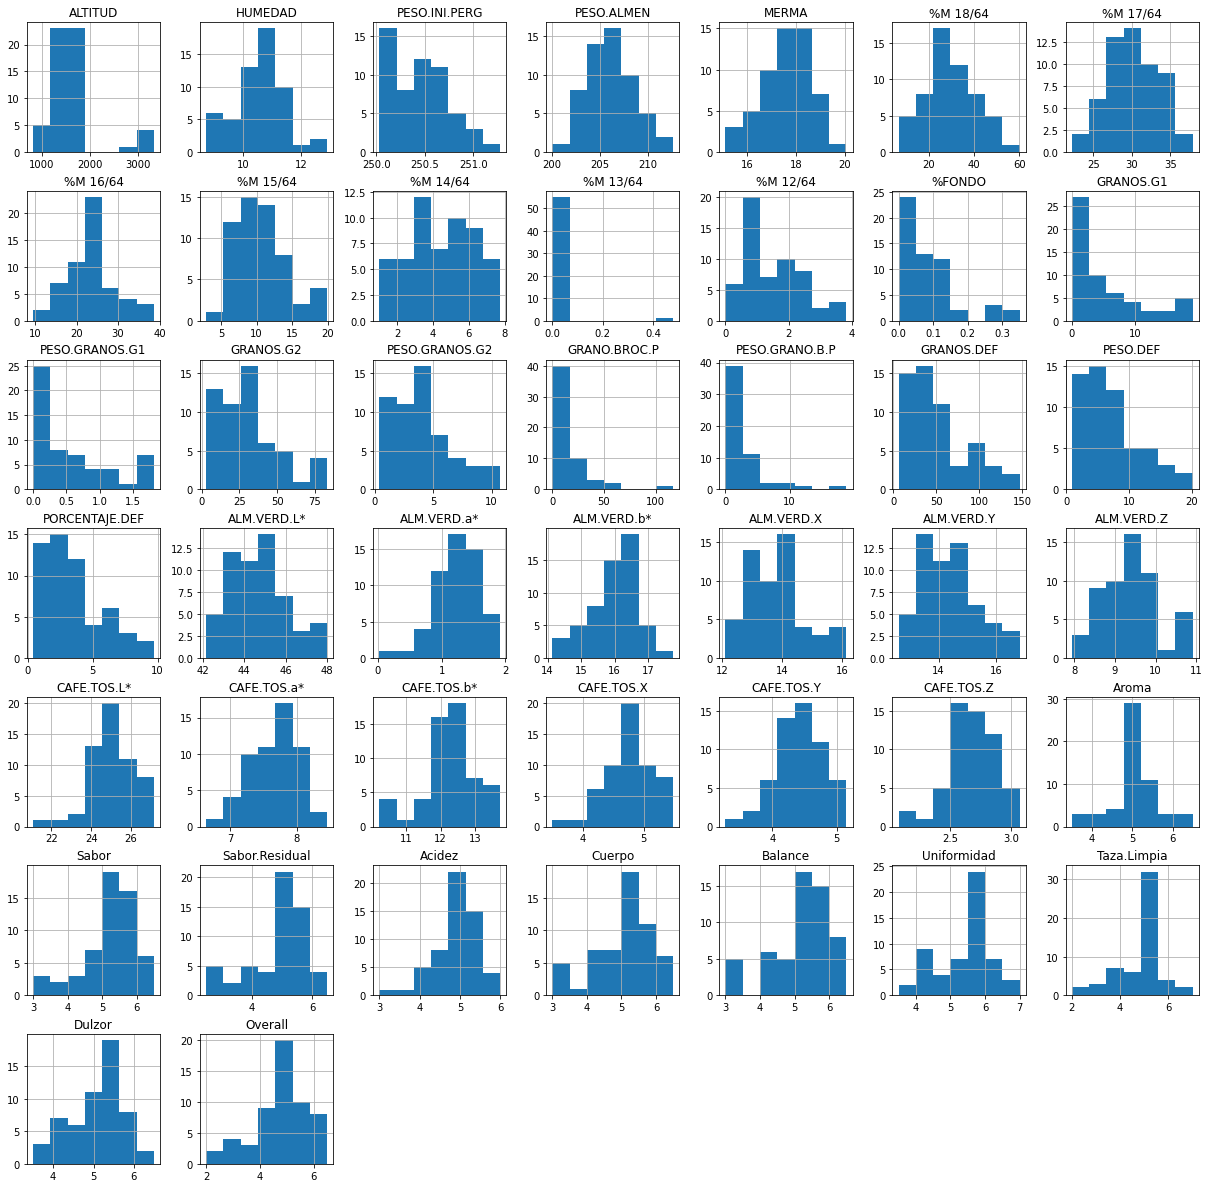

In [23]:
df.hist(bins=7, figsize=(21,21))
plt.show()

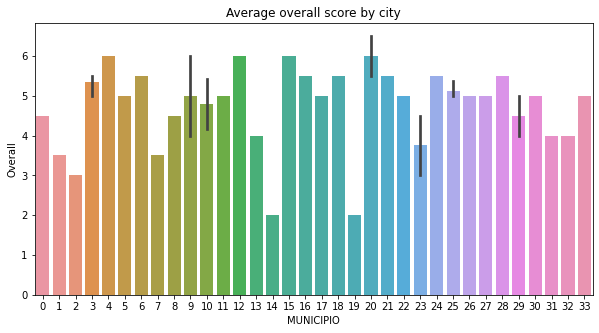

In [24]:
plt.figure(figsize=(10,5))
plt.title("Average overall score by city")
sns.barplot(x=df["MUNICIPIO"], y=df["Overall"])
plt.show()

This eliminates the chance that a particular city is that much better at making coffee than the others

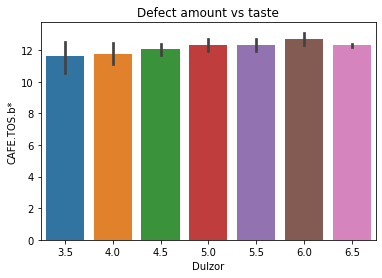

In [26]:
plt.title("Defect amount vs taste")
sns.barplot(y=df["CAFE.TOS.b*"], x=df["Dulzor"])
plt.show()

Although there does seem to be a relationship between the taste and number of defects, I'm not sure how this would line up with the dataset we're currently using as that has columns "Category.One.Defects" and "Category.Two.Defects" which might strongly correlate with the taste for defective beans but not give too much info on non-defective ones.

(-2.0, 23.0)

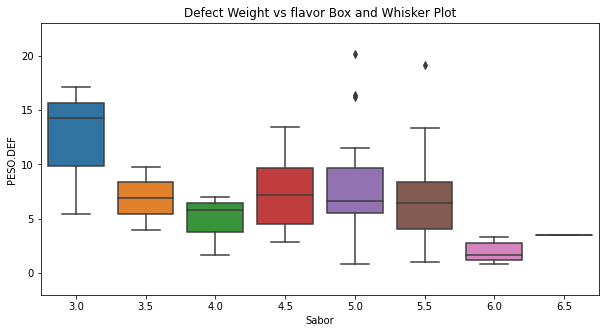

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Defect Weight vs flavor Box and Whisker Plot")
sns.boxplot(x=df["Sabor"], y=df["PESO.DEF"], ax=ax)
ax.set_ylim(-2, 23)

### Correlation Plots between features of similar scale

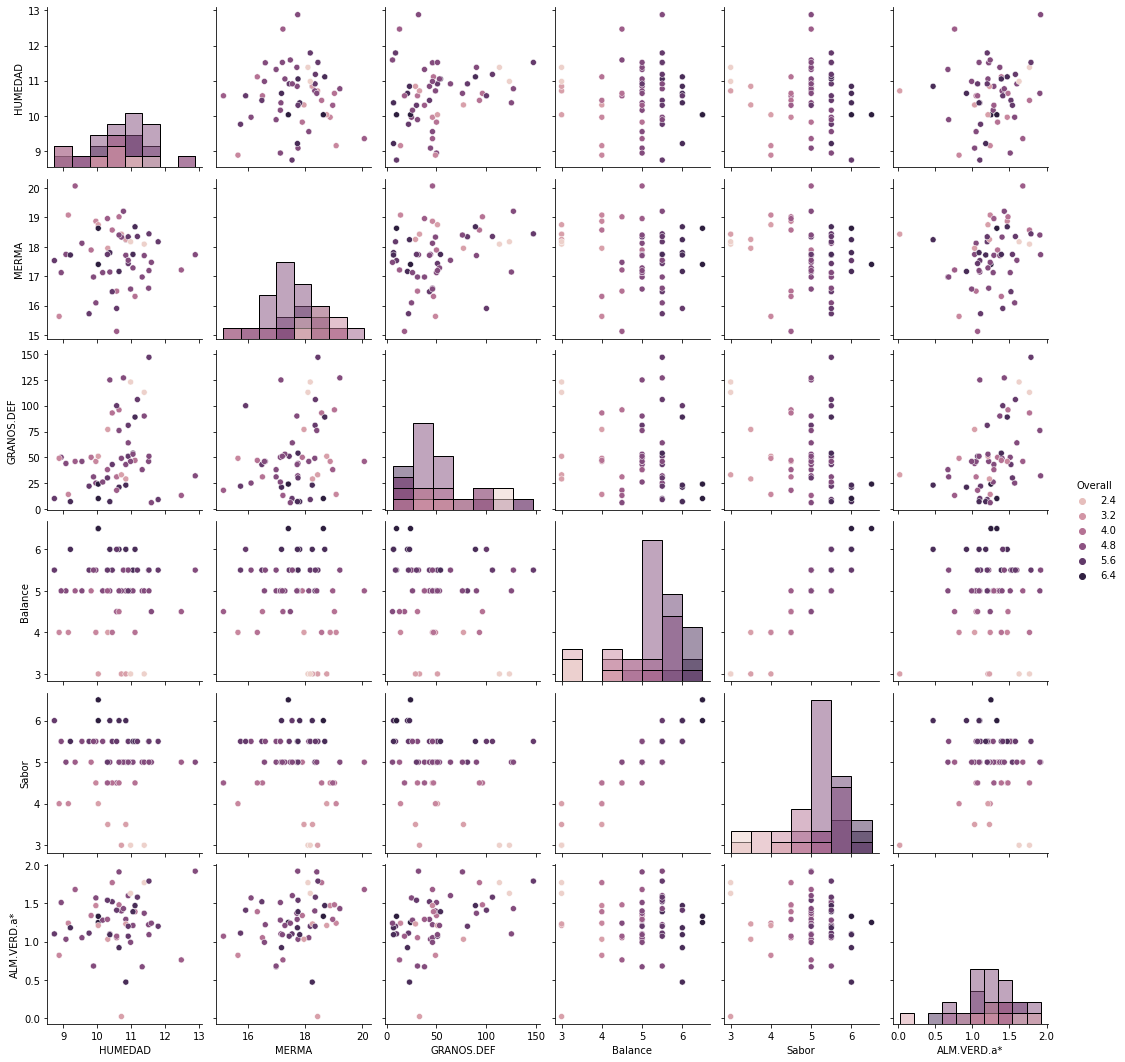

In [35]:
sns.pairplot(vars=["HUMEDAD","MERMA", "GRANOS.DEF","Balance","Sabor", "ALM.VERD.a*"],data=df,diag_kind="hist",hue="Overall")
plt.show()

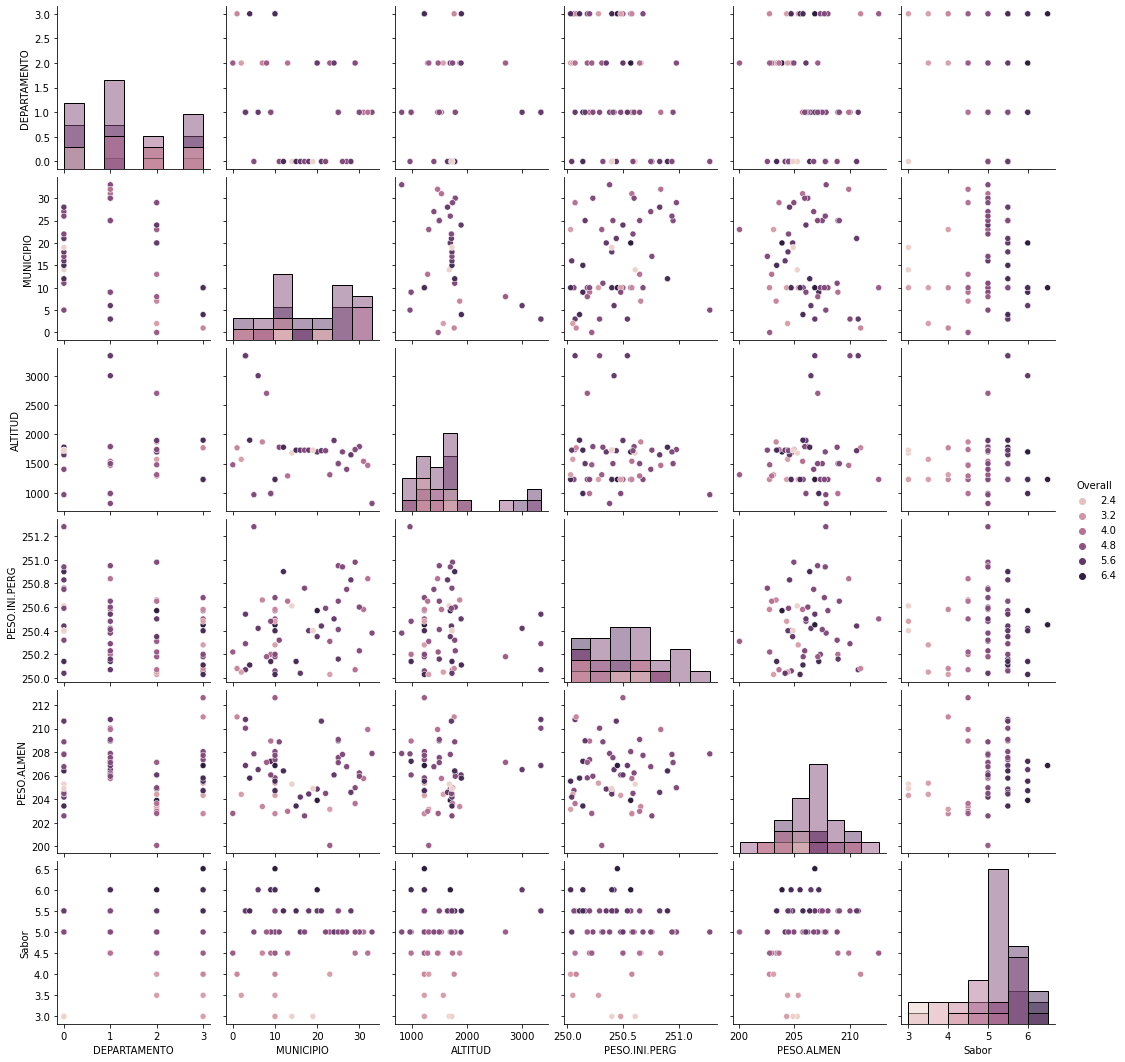

In [36]:
sns.pairplot(vars=["DEPARTAMENTO","MUNICIPIO", "ALTITUD","PESO.INI.PERG","PESO.ALMEN", "Sabor"],data=df,diag_kind="hist",hue="Overall")
plt.show()

Heat map with correlation; this was something I got from them that I'm not sure how it works but I think it could apply in the exact same way to our data which can show which features have the strongest correlation with each other

C:\Users\gajavegr\AppData\Local\Temp/ipykernel_19692/2248419459.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


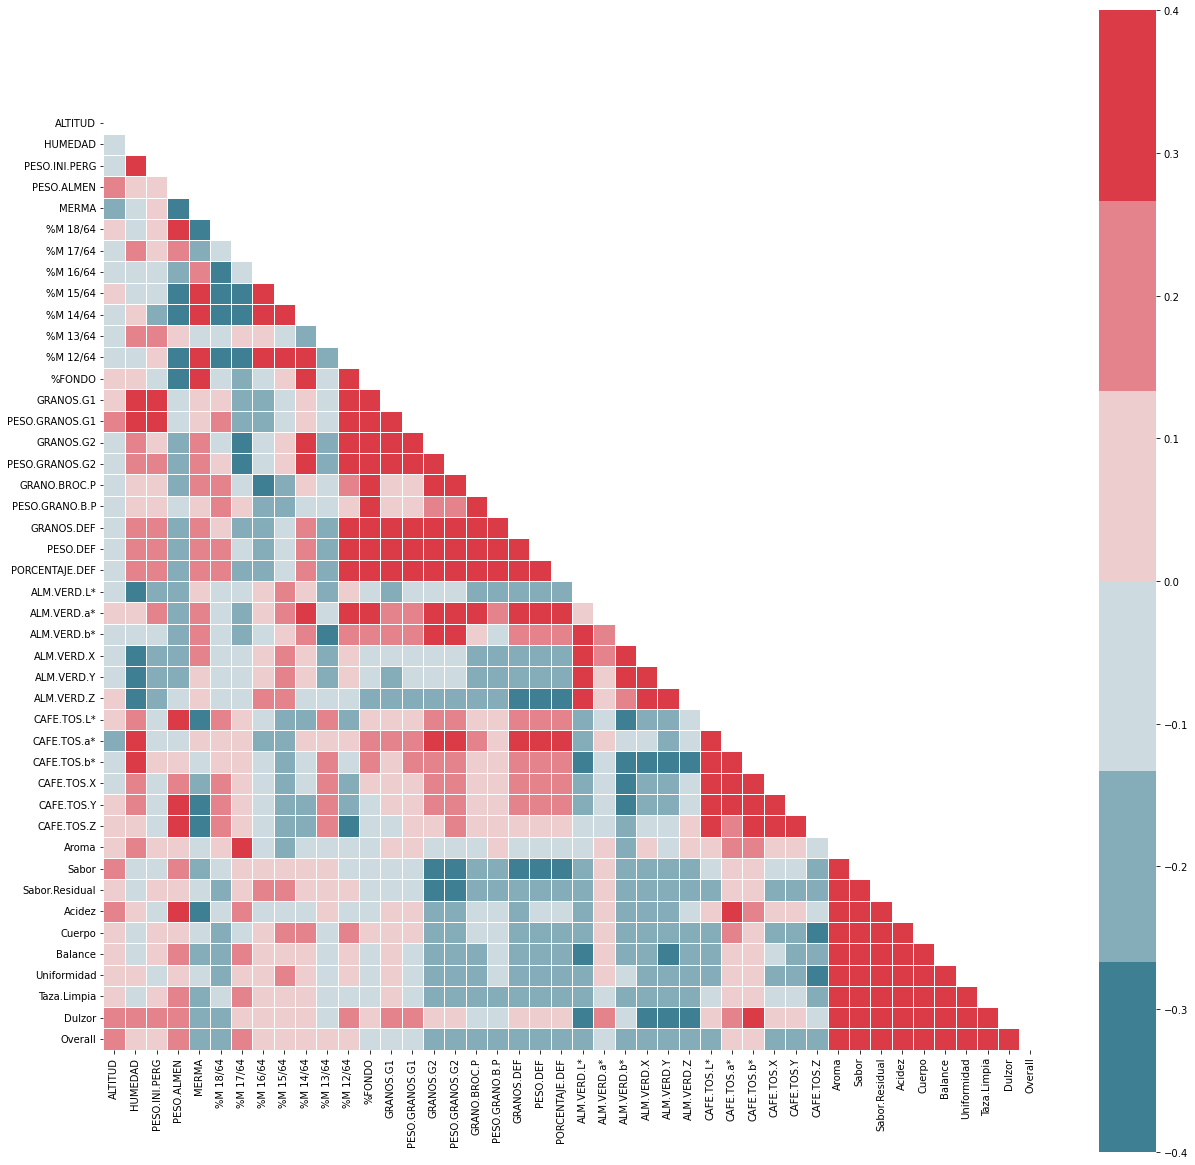

In [38]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21,21))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=False)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.4, vmin=-0.4,
            square=True, linewidths=.5, ax=ax)   
plt.show()

In [39]:
df.corr()

,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,...,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
ALTITUD,1.000000,-0.069331,-0.101147,0.174651,-0.183995,0.040723,-0.023225,-0.044723,0.016199,-0.075884,...,0.123700,0.170613,0.107474,0.258203,0.112274,0.124707,0.076140,0.097797,0.225902,0.133786
HUMEDAD,-0.069331,1.000000,0.317136,0.036211,-0.005656,-0.061431,0.248391,-0.018481,-0.042944,0.067878,...,0.155422,-0.075938,-0.015138,0.025564,-0.007132,-0.022419,0.020429,-0.009980,0.173985,0.020066
PESO.INI.PERG,-0.101147,0.317136,1.000000,0.048446,0.047340,0.079554,0.027243,-0.074397,-0.072279,-0.157628,...,0.042092,-0.000190,0.083724,-0.023654,0.016518,0.044226,-0.030066,0.041407,0.178393,0.032217
PESO.ALMEN,0.174651,0.036211,0.048446,1.000000,-0.995408,0.283907,0.181999,-0.231210,-0.301192,-0.403753,...,0.065704,0.176009,0.103173,0.305321,0.039533,0.146335,0.128658,0.174132,0.240132,0.152073
MERMA,-0.183995,-0.005656,0.047340,-0.995408,1.000000,-0.276506,-0.179280,0.224150,0.294377,0.389126,...,-0.061810,-0.176235,-0.095153,-0.307653,-0.037967,-0.142051,-0.131451,-0.170266,-0.222934,-0.148983
%M 18/64,0.040723,-0.061431,0.079554,0.283907,-0.276506,1.000000,-0.075080,-0.949059,-0.873009,-0.751823,...,0.046049,-0.084068,-0.175676,-0.002404,-0.182688,-0.141003,-0.137813,-0.102181,-0.139615,-0.141087
%M 17/64,-0.023225,0.248391,0.027243,0.181999,-0.179280,-0.075080,1.000000,-0.041125,-0.339676,-0.319297,...,0.352610,0.107309,0.092331,0.183175,-0.000273,0.143450,0.051939,0.178050,0.054207,0.143821
%M 16/64,-0.044723,-0.018481,-0.074397,-0.231210,0.224150,-0.949059,-0.041125,1.000000,0.831701,0.630830,...,-0.129377,0.050306,0.133872,-0.053232,0.123750,0.073667,0.087759,0.045657,0.096060,0.096760
%M 15/64,0.016199,-0.042944,-0.072279,-0.301192,0.294377,-0.873009,-0.339676,0.831701,1.000000,0.810884,...,-0.181032,0.070073,0.156010,-0.027018,0.211792,0.113161,0.162917,0.069308,0.127669,0.111015
%M 14/64,-0.075884,0.067878,-0.157628,-0.403753,0.389126,-0.751823,-0.319297,0.630830,0.810884,1.000000,...,-0.078104,0.028270,0.115442,-0.039916,0.194737,0.092113,0.106055,0.031039,0.088536,0.052647


Nice way to visualize individual variables

In [41]:
b="Aroma"

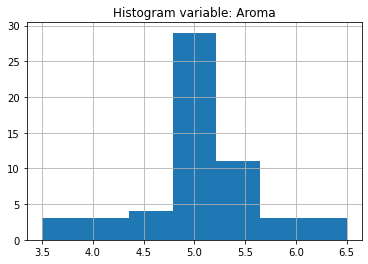

In [43]:
df[b].hist(bins=7)
plt.title(f"Histogram variable: {b}")
plt.show()

In [44]:
#"Aroma","Sabor","Sabor.Residual","Acidez","Cuerpo","Balance","Uniformidad","Taza.Limpia","Dulzor","Overall"
df.groupby(b).size()

Aroma
3.5     3
4.0     3
4.5     4
5.0    29
5.5    11
6.0     3
6.5     3
dtype: int64